<a href="https://colab.research.google.com/github/habaccc/Python_study/blob/main/ml05_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier # KNN 분류기
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 - 분류기
from sklearn.metrics import confusion_matrix, accuracy_score # 평가지표

# Python에서 이미지 다루기

In [2]:
flower = datasets.load_sample_image('flower.jpg')
#> load_sample_image 함수: 이미지 파일을 읽어서, 이미지를 np.ndarray 타입으로 변환.

In [3]:
type(flower)

numpy.ndarray

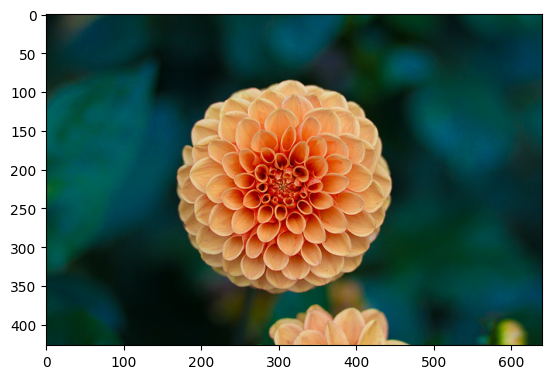

In [4]:
plt.imshow(flower)
plt.show()

In [5]:
flower.shape #> (height, width, rgb/rgba)

(427, 640, 3)

이미지 ndarray 배열의 모양:

* 흑백 이미지: (height, width)
* 컬러 이미지:
  * 불투명 이미지(jpg, bmp, ...): (height, width, 3)
  * 투명도가 있는 이미지(png): (height, width, 4)
* 이미지 ndarray의 숫자 스케일:
  * 0 ~ 255 정수 스케일
  * 0.0 ~ 1.0 실수 스케일

In [6]:
flower

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [7]:
flower_scaled = flower / 255

In [9]:
flower_scaled[:, :, 0]

array([[0.00784314, 0.01176471, 0.02745098, ..., 0.00392157, 0.        ,
        0.        ],
       [0.00392157, 0.01176471, 0.02745098, ..., 0.        , 0.00392157,
        0.00392157],
       [0.00784314, 0.02352941, 0.02745098, ..., 0.00392157, 0.00392157,
        0.00392157],
       ...,
       [0.        , 0.00392157, 0.00392157, ..., 0.01960784, 0.02352941,
        0.02745098],
       [0.        , 0.00392157, 0.00392157, ..., 0.02352941, 0.02745098,
        0.02745098],
       [0.        , 0.00392157, 0.        , ..., 0.02745098, 0.03137255,
        0.03529412]])

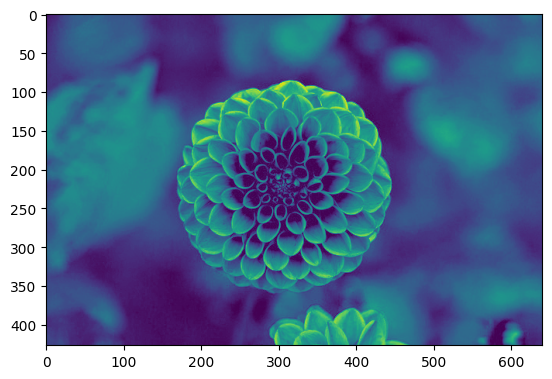

In [12]:
plt.imshow(flower[:, :, 2])
plt.show()

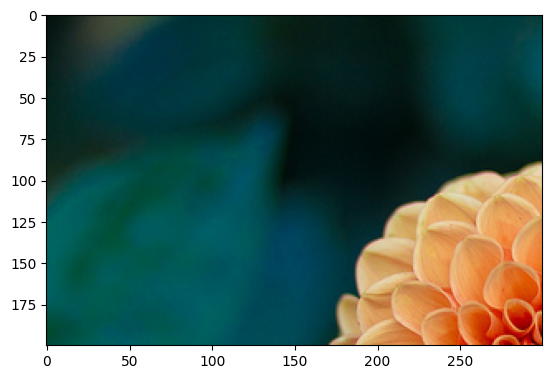

In [14]:
# 이미지 잘라내기 - ndarray slicing
flower_cropped = flower[:200, :300, :]
plt.imshow(flower_cropped)
plt.show()

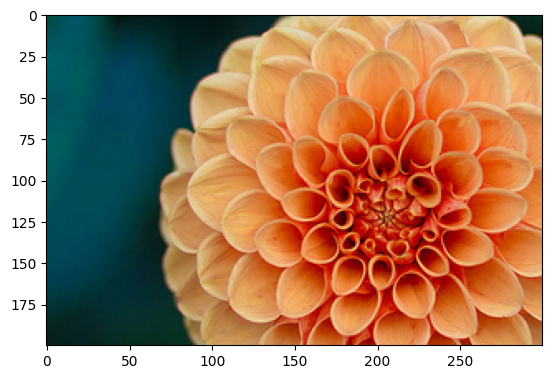

In [15]:
# 이미지 잘라내기 - ndarray slicing
flower_cropped = flower[100:300, 100:400, :]
plt.imshow(flower_cropped)
plt.show()

In [16]:
# ndarray를 이미지 파일로 저장:
plt.imsave('flower_cropped.jpg', flower_cropped)

In [17]:
# 이미지 파일을 ndarray로 읽어들임:
img = plt.imread('flower_cropped.jpg')

In [18]:
type(img)

numpy.ndarray

In [19]:
img.shape

(200, 300, 3)

# MNIST 데이터 셋

70,000개의 숫자(0~9) 손글씨 흑백 이미지(28x28)가 numpy.ndarray로 저장된 데이터셋.

In [21]:
mnist = datasets.fetch_openml('mnist_784')

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [24]:
type(mnist) #> Bunch - Python의 dict와 비슷(key-value 쌍으로 데이터 저장)

sklearn.utils._bunch.Bunch

In [23]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [25]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [28]:
X = mnist['data'].values.copy()

In [29]:
type(X)

numpy.ndarray

In [32]:
X.shape #> (70000, 784) = (n_samples개수, n_features개수) = (이미지 개수, 픽셀 수)
# 샘플 데이터 1개 -> 28x28 모양의 2차원 배열을 1차원으로 펼친 형태.

(70000, 784)

In [33]:
y = mnist['target'].values.copy() # 타겟 배열

In [34]:
type(y)

pandas.core.arrays.categorical.Categorical

In [35]:
y.shape

(70000,)

In [36]:
y[:10] # 0 ~ 9 숫자들이 무작위로 섞여있음.

['5', '0', '4', '1', '9', '2', '1', '3', '1', '4']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [37]:
val_counts = y.value_counts()
val_counts

0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
dtype: int64

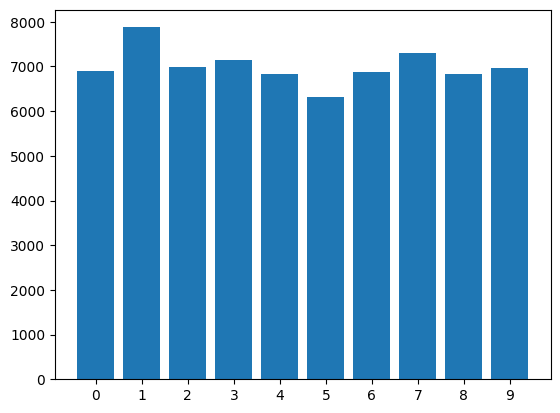

In [39]:
plt.bar(x=val_counts.index, height=val_counts)
plt.show()

In [40]:
# 특성 배열 X의 첫번째 원소 시각화
img = X[0].reshape((28, 28))
img.shape

(28, 28)

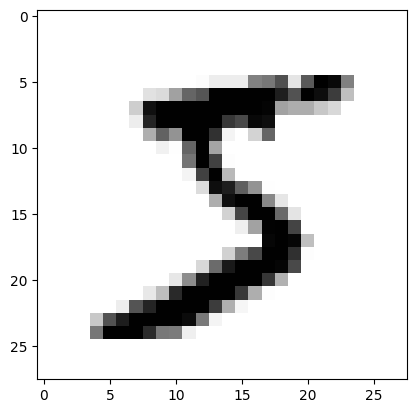

In [41]:
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

특정배열 x에서 첫 100개의 이미지를 10(row)x10(column) subplots에 시각화.

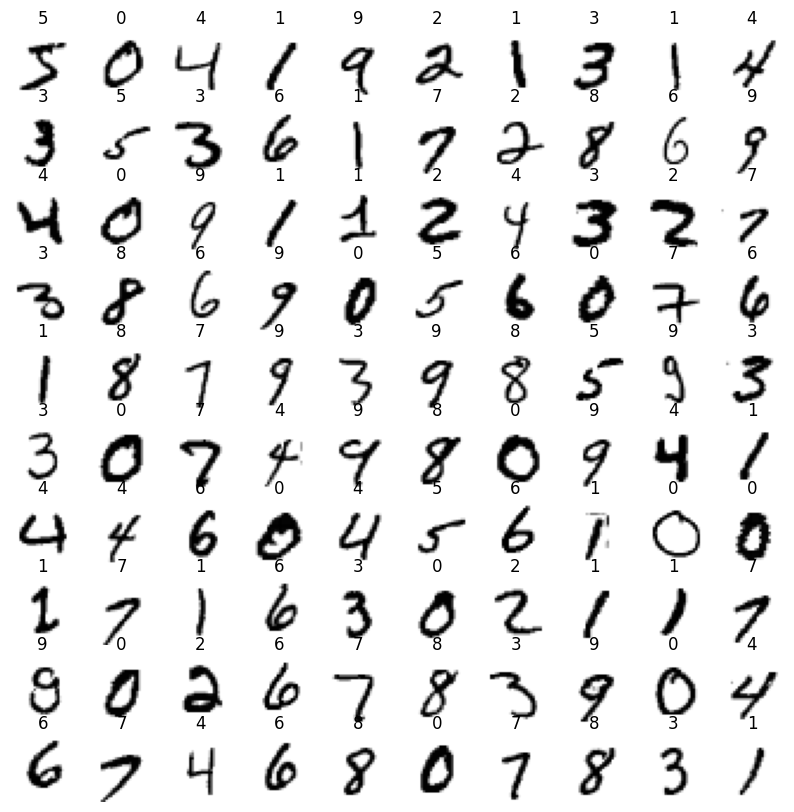

In [45]:
nrows = 10 # subplot의 row 개수
ncols = 10 # subplot의 column 개수

fig, ax = plt.subplots(nrows, ncols, figsize=(ncols, nrows))
for i in range(nrows):
  for j in range(ncols):
    idx = i * ncols + j
    img = X[idx].reshape((28, 28))
    label = y[idx]
    ax[i, j].imshow(img, cmap=plt.cm.binary)
    ax[i, j].axis('off')
    label = y[idx]
    ax[i, j].set_title(label)


plt.show()

# 훈련 / 검증 / 테스트 셋 분리

* 훈련 셋(Train set): 머신 러닝 모델을 학습시키기 위한 데이터.
* 검증 셋(Validation set): 훈련된 머신 러닝 모델의 일반화 성능을 테스트하기 위한 데이터 셋. 하이퍼 파라미터(예: KNN에서 k값)들을 튜닝하기 위한 목적으로 사용.
* 테스트 셋(Test set): 최종적으로 선택된 머신 러닝 모델의 이란화 성능을 예상하기 위해서 사용하는 데이터 셋. 머신 러닝 전 과정에서 오직 한 번만 사용됨.

## 70,000개의 전체 데이터를 훈련 셋 60,000개, 데스트 셋 10,000개로 분리

MNIST는 데이터셋이 무작위로 섞여 있기 때문에 순차추출(sequential sampling)을 해도 됨.

In [47]:
X_tr_total, X_te = X[:60_000, :], X[60_000:, :]
y_tr_total, y_te = y[:60_000], y[60_000:]

In [48]:
X_tr_total.shape, X_te.shape

((60000, 784), (10000, 784))

In [49]:
y_tr_total.shape, y_te.shape

((60000,), (10000,))

## 60,000개의 훈련 셋을 훈련 셋(90%), 검증 셋(10%)으로 분리

In [51]:
X_tr, X_val = X_tr_total[:54_000, :], X_tr_total[54_000:, :]
y_tr, y_val = y_tr_total[:54_000], y_tr_total[54_000:]

In [52]:
X_tr.shape, X_val.shape

((54000, 784), (6000, 784))

In [53]:
y_tr.shape, y_val.shape

((54000,), (6000,))

In [ ]:
# X_tr_total, X_te, y_tr_total, y_te = train_test_split(X, y, ...)
# X_tr, X_val, y_tr, y_val = train_test_split(X_tr_total, y_tr_total, ...)

# KNN 분류 모델 생성, 훈련, 평가

### 모델 생성

In [54]:
knn = KNeighborsClassifier(n_jobs=-1)
# n_jobs: 동시 병렬 작업 개수, 기본값은 1, -1인 경우는 CPU의 모든 코어를 사용(최대 성능 사용)

### 모델 학습

In [55]:
knn.fit(X_tr, y_tr)

KNeighborsClassifier()

### 훈련 셋 예측 결과 평가

In [56]:
y_tr_pred = knn.predict(X_tr) # 훈련 셋의 예측값

In [57]:
accuracy_score(y_tr, y_tr_pred) # 훈련 셋의 정확도

0.9811481481481481

In [58]:
conf_mat = confusion_matrix(y_tr, y_tr_pred)
conf_mat

array([[5310,    3,    2,    0,    1,    4,   13,    1,    1,    1],
       [   1, 6092,    6,    0,    0,    0,    1,   10,    1,    1],
       [  24,   34, 5231,    6,    5,    3,    6,   42,    4,    3],
       [   4,   12,   24, 5379,    0,   31,    2,   20,   16,   16],
       [   3,   34,    1,    1, 5132,    0,    7,    4,    1,   64],
       [  12,    5,    3,   33,    6, 4758,   38,    2,    3,   12],
       [  14,    9,    0,    0,    4,   12, 5307,    0,    1,    0],
       [   1,   43,    7,    2,    8,    0,    0, 5506,    0,   30],
       [  14,   55,    9,   38,   18,   46,   13,   10, 5013,   38],
       [  12,    7,    5,   20,   29,    6,    1,   33,    6, 5254]])

### 훈련 셋에서 틀린 예측 분석

In [59]:
# 예측값과 실제값이 다른 훈련 샘플들:
X_tr_wrong = X_tr[y_tr != y_tr_pred]

In [61]:
X_tr_wrong.shape

(1018, 784)

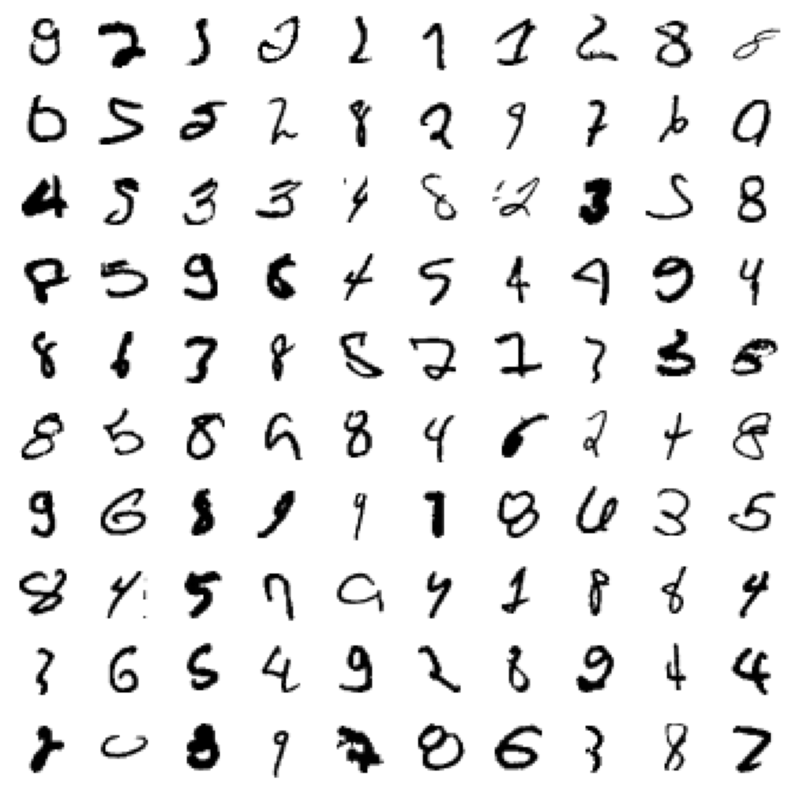

In [63]:
# 예측이 틀린 훈련 셋 샘플들 중 첫 100개 시각화
nrows = 10
ncols = 10

fig, ax = plt.subplots(nrows, ncols, figsize=(ncols, nrows))

for i in range(nrows):
  for j in range(ncols):
    idx = i * nrows + j
    img = X_tr_wrong[idx].reshape((28, 28))
    ax[i, j].imshow(img, cmap=plt.cm.binary)
    ax[i, j].axis('off')

### 오차 행렬 시각화

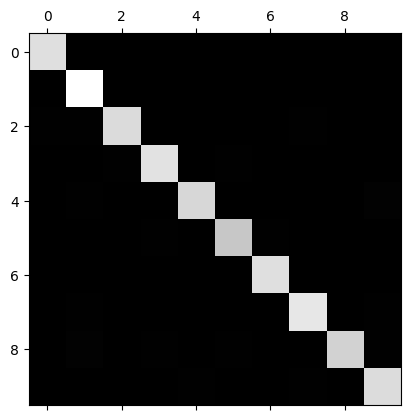

In [64]:
plt.matshow(conf_mat, cmap=plt.cm.gray)
# cmap 파라미터: color map
# (1) binary: 0(white), 숫자가 커질 수록 검은색에 가까워짐.
# (2) gray: 0(black). 숫자가 커질 수록 흰색에 가까워짐.
plt.show()

* 오차 행렬에서 대각선 부분은 예측값이 맞는 부분 -> 관심 밖.
* 대각선 부분을 숫자 0으로 대체 -> 오답률이 큰 부분이 흰색에 가까워짐.

In [72]:
np.fill_diagonal(conf_mat, 0)
conf_mat

array([[ 0,  3,  2,  0,  1,  4, 13,  1,  1,  1],
       [ 1,  0,  6,  0,  0,  0,  1, 10,  1,  1],
       [24, 34,  0,  6,  5,  3,  6, 42,  4,  3],
       [ 4, 12, 24,  0,  0, 31,  2, 20, 16, 16],
       [ 3, 34,  1,  1,  0,  0,  7,  4,  1, 64],
       [12,  5,  3, 33,  6,  0, 38,  2,  3, 12],
       [14,  9,  0,  0,  4, 12,  0,  0,  1,  0],
       [ 1, 43,  7,  2,  8,  0,  0,  0,  0, 30],
       [14, 55,  9, 38, 18, 46, 13, 10,  0, 38],
       [12,  7,  5, 20, 29,  6,  1, 33,  6,  0]])

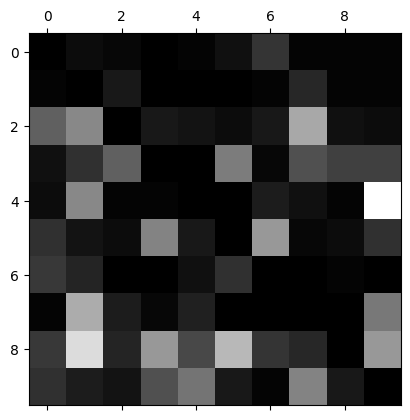

In [73]:
plt.matshow(conf_mat, cmap=plt.cm.gray)
plt.show()

### 검증 셋 예측 결과 평가

In [69]:
y_val_pred = knn.predict(X_val) # 검증 셋의 예측값

In [70]:
accuracy_score(y_val, y_val_pred) # 검증 셋의 정확도

0.9758333333333333

과대적합(overfilling)의 크기가 작음 -> 일반화 성능이 나쁘지 않을 거라고 예상됨.

## KNN 모델 튜닝(하이퍼파라미터 튜닝)

가장 적절한 k값 찾기

In [71]:
k_vals = np.arange(1, 12, 2) # [1, 3, 5, 7, 9, 11]
train_scores = [] # k값에 따른 훈련 셋 정확도 리스트
val_scores = [] # k값에 따른 검증 셋에서의 정확도 리스트
for k in k_vals:
  knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1) # KNN 분류기 생성
  knn.fit(X_tr, y_tr) # 모델 훈련(데이터 학습)
  train_acc = knn.score(X_tr, y_tr) # 훈련 셋에서의 정확도
  train_scores.append(train_acc)
  val_acc = knn.score(X_val, y_val) # 검증 셋에서의 정확도
  val_scores.append(val_acc)